In [1]:
import snap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.Analyzing the Wikipedia voters network [27 points]


* To make our questions clearer, we will use the following small graph as a running example:
$G_{small} = (V_{small} , E_{small} )$, where $V_{small} = \{1, 2, 3\} and E_{small} = \{(1, 2), (2, 1), (1, 3), (1, 1)\}$.
* Compute and print out the following statistics for the wiki-Vote network:
 * The number of nodes in the network. (G small has 3 nodes.)
 * The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E. (G small has 1 self-edge.)
 * The number of directed edges in the network, i.e., the number of ordered pairs (a, b) ∈ E for which $a \neq b$. (G small has 3 directed edges.)
 * The number of undirected edges in the network, i.e., the number of unique unordered pairs (a, b), $a \neq b$ for which (a, b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge. (G small has 2 undirected edges.)

In [2]:
Gsmall=snap.TUNGraph().New()
Gsmall.AddNode(1)
Gsmall.AddNode(2)
Gsmall.AddNode(3)
Gsmall.AddEdge(1,2)
Gsmall.AddEdge(2,1)
Gsmall.AddEdge(1,3)
Gsmall.AddEdge(1,1)
# Gsmall=snap.LoadEdgeList(snap.PNGraph,'data/Wiki-Vote.txt',0,1)
print('nodes:',Gsmall.GetNodes())
print('self_loops:',snap.CntSelfEdges(Gsmall))
print('direct_edge:',snap.CntUniqDirEdges(Gsmall))
print('undirect_edge:',snap.CntUniqUndirEdges(Gsmall))

nodes: 3
self_loops: 1
direct_edge: 4
undirect_edge: 2


In [4]:
n=Gsmall.GetNI(1)
outdegreee=n.GetDeg()
for i in range(outdegreee):
    idd=n.GetNbrNId(i)
    print(idd)

1
2
3


 * The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a, b), $a \neq b$, for which (a, b) ∈ E and (b, a) ∈ E. (G small has 1 reciprocated edge.)
 * The number of nodes of zero out-degree. (G small has 1 node with zero out-degree.)
 * The number of nodes of zero in-degree. (G small has 0 nodes with zero in-degree.)

In [5]:
recip=set()
for e in Gsmall.Edges():
    if e.GetSrcNId()!=e.GetDstNId() and Gsmall.IsEdge(e.GetDstNId(),e.GetSrcNId()):
        recip.add((min(e.GetSrcNId(),e.GetDstNId()),max(e.GetSrcNId(),e.GetDstNId())))
print('reciprocated',len(recip))
print('%d  nodes have out degree 0'%snap.CntOutDegNodes(Gsmall,0))
print('%d  nodes have int degree 0'%snap.CntInDegNodes(Gsmall,0))

reciprocated 2
0  nodes have out degree 0
0  nodes have int degree 0


### 2.Further Analyzing the Wikipedia voters network [33 points]
$Y\approx1000x^{-1.28}$

a=-1.281065,b=3.132455


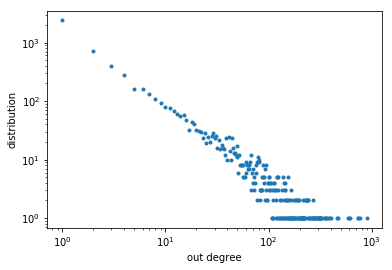

In [4]:
from collections import defaultdict
def fit(x,y):
    x=np.log10(x)
    y=np.log10(y)
    coef=np.polyfit(x,y,deg=1)
    return coef
histogram=snap.TIntPrV()
snap.GetOutDegCnt(Gsmall,histogram)
x,y=[],[]
for vv in histogram:
    if vv.GetVal1()>0:
        x.append(vv.GetVal1())
        y.append(vv.GetVal2())
plt.loglog(x,y,'.')
plt.xlabel('out degree')
plt.ylabel('distribution')
a,b=fit(x,y)
print('a=%f,b=%f'%(a,b))

### Finding Experts on the Java Programming Language on StackOverflow [40 points]

In [5]:
G=snap.LoadEdgeList(snap.PNGraph,'data/stackoverflow-Java.txt',0,1)

In [6]:
wccs=snap.TCnComV()
snap.GetWccs(G,wccs)
print('# of weakly connected components is %d'%wccs.Len())

# of weakly connected components is 10143


In [7]:
G_max_wcc=snap.GetMxWcc(G)
print('max weak connect component have nodes:',G_max_wcc.GetNodes())
print('max weak connect component have edges:',G_max_wcc.GetEdges())

max weak connect component have nodes: 131188
max weak connect component have edges: 322486


In [9]:
pk=snap.TIntFltH()
snap.GetPageRank(G,pk)
pk.SortByDat(False)

In [12]:
top=3
for i,key in enumerate(pk):
    print(key,pk[key])
    if i==top:
        break

992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619
139985 0.005520505792973484
